# Harmonics in Polyphase Power Systems
### *Chapter 10 - Polyphase AC Circuits*

In the chapter on mixed-frequency signals, we explored the concept of harmonics in AC systems: frequencies that are integer multiples of the fundamental source frequency.

With AC power systems where the source voltage waveform coming from an AC generator (alternator) is supposed to be a single-frequency sine wave, undistorted, there should be no harmonic content . . . ideally.

## Nonlinear Components on AC Systems

This would be true were it not for nonlinear components. Nonlinear components draw current disproportionately with respect to the source voltage, causing non-sinusoidal current waveforms.

Examples of nonlinear components include gas-discharge lamps, semiconductor power-control devices (diodes, transistors, SCRs, TRIACs), Transformers (primary winding magnetization current is usually non-sinusoidal due to the B/H saturation curve of the core), and electric motors (again, when magnetic fields within the motor’s core operate near saturation levels).

Even incandescent lamps generate slightly nonsinusoidal currents, as the filament resistance changes throughout the cycle due to rapid fluctuations in temperature.

As we learned in the mixed-frequency chapter, any distortion of an otherwise sine-wave shaped waveform constitutes the presence of harmonic frequencies.

When the nonsinusoidal waveform in question is symmetrical above and below its average centerline, the harmonic frequencies will be odd integer multiples of the fundamental source frequency only, with no even integer multiples.

Most nonlinear loads produce current waveforms like this, and so even-numbered harmonics (2nd, 4th, 6th, 8th, 10th, 12th, etc.) are absent or only minimally present in most AC power systems.

![nonsine-symmetric-waveforms](https://www.allaboutcircuits.com/uploads/articles/symmetrical-waveforms-example.jpg)

Examples of nonsymmetrical waveforms with even harmonics present are shown for reference in the figure below.

![nonsine-nonsymmetric-waveforms](https://www.allaboutcircuits.com/uploads/articles/nonsymmetrical-waveforms-example.jpg)

Even though half of the possible harmonic frequencies are eliminated by the typically symmetrical distortion of nonlinear loads, the odd harmonics can still cause problems. Some of these problems are general to all power systems, single-phase or otherwise.

Transformer overheating due to eddy current losses, for example, can occur in any AC power system where there is significant harmonic content.

However, there are some problems caused by harmonic currents that are specific to polyphase power systems, and it is these problems to which this section is specifically devoted.

## Linear AC System Simulation

First, we’ll begin our simulation with a very simple AC circuit: a single sine-wave voltage source with a purely linear load and all associated resistances: 

![linear-ac-system](https://www.allaboutcircuits.com/uploads/articles/spice-circuit-with-single-sine-wave-source.jpg)

The $R_\text{source}$, henceforth '$R_\text{src}$', and $R_\text{line}$ resistances in this circuit do more than just mimic the real world: they also provide convenient shunt resistances for measuring currents in the SPICE simulation: by reading voltage across a $1\Omega$ resistance, you obtain a direct indication of current through it, since E = IR.

A SPICE simulation of this circuit (SPICE listing: “linear load simulation”) with Fourier analysis on the voltage measured across $R_\text{line}$ should show us the harmonic content of this circuit’s line current. Being completely linear in nature, we should expect no harmonics other than the 1st (fundamental) of $60$ Hz, assuming a $60$ Hz source.

Via KVL and Ohm's Law:  

$$ 120\mathrm{V} = I\,(R_\text{src} + R_\text{line} + R_\text{load}) = 1002\Omega \cdot I$$

Dividing throughout by $1002\Omega$ gives:  

$$I = \frac{120\mathrm{V}}{1002\Omega} \approxeq 119.76\,\mathrm{mA} $$

In [1]:
120/1002

0.11976047904191617

## Simple Nonlinear Single-Phase AC System Simulation

Next, I’d like to simulate a nonlinear load so as to generate harmonic currents. This can be done in two fundamentally different ways. One way is to design a load using nonlinear components such as diodes or other semiconductor devices which are easy to simulate with SPICE. Another is to add some AC current sources in parallel with the load resistor.

The latter method is often preferred by engineers for simulating harmonics since current sources of known value lend themselves better to mathematical network analysis than components with highly complex response characteristics.

Since we’re letting SPICE do all the math work, the complexity of a semiconductor component would cause no trouble for us, but since current sources can be fine-tuned to produce any arbitrary amount of current (a convenient feature), I’ll choose the latter approach shown in the figure below, and in the SPICE listing “Nonlinear load simulation”.

![nonlinear-single-phase-AC System](https://www.allaboutcircuits.com/uploads/articles/spice-listing-nonlinear-load-simulation.jpg)

To solve this circuit we will use superposition.  

With $120\mathrm{V}\,60\mathrm{Hz}$ as the only power supply:  

$$ I \approxeq 119.76\mathrm{mA}\,60\mathrm{Hz} $$

With $50\mathrm{mA}\,180\mathrm{Hz}$ as the only power supply:  

Via Ohm's Law and KVL,  

$$ R_\text{load}I_1 - (R_\text{src} + R_\text{line})\,I_2 = 0$$

$$ 1000\,\Omega \cdot I_1 = 2\,\Omega\cdot I_2$$

And, via KCL,  

$$ I_1 + I_2 = I_\text{src} = 50\mathrm{mA}\,180\mathrm{Hz}$$

Via the above two equations and substitution,  

$$ I_1 + 500I_1 = I_\text{src}$$

$$ I_1 = \frac{I_\text{src}}{501} \approxeq 99.8\mu \mathrm{A}\,180\mathrm{Hz}$$

In [2]:
50/501

0.0998003992015968

And, via the above equation, KCL, and substitution,  

$$ I_2 = I_\text{src} - I_1 \approxeq 49.9\mathrm{mA}\,180\mathrm{Hz} $$

In [3]:
50 - 50/501

49.9001996007984

In [4]:
import numpy as np
import matplotlib.pyplot as plt

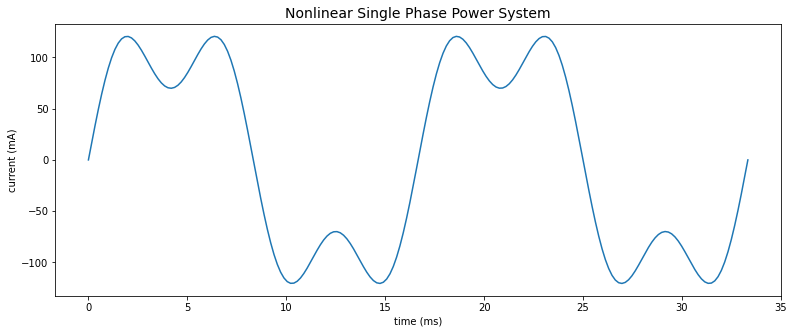

In [5]:
# Plot the current of the above circuit.
f = 60
w = f*2*np.pi
p = 1/f

# Create the time domain.
t = np.linspace(0, 2*p, num=200)

# Define the Fourier Series, denoted as 'I'.
C_1, C_3 = 119.76, 49.9
I = C_1*np.sin(w*t) + C_3*np.sin(w*3*t)

# Create the figure and axes object.
fig, ax = plt.subplots(figsize=(13,5))
ax.set_title('Nonlinear Single Phase Power System', size=14)
ax.set_xlabel('time (ms)')
ax.set_ylabel('current (mA)')

# Plot the current.
L = ax.plot(t*1000, I)

## Nonlinear Single-Phase AC System Simulation with Multiple Current Sources

If we were to add more current sources to the “load,” we would see a further distortion of the line current waveform from the ideal sine-wave shape, and each of those harmonic currents would appear in the Fourier analysis breakdown. See the figure below and the SPICE listing: “Nonlinear load simulation”.

![nonlinear-single-phase-AC System-2](https://www.allaboutcircuits.com/uploads/articles/nonlinear-load-simulation.jpg)

The fundamental frequency and the amplitude of the first and third harmonic are the same as the previous circuit.  The amplitude of the other harmonics are equal to the third's.

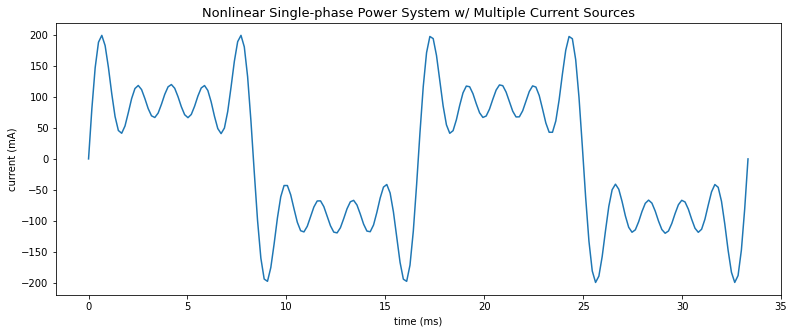

In [6]:
# Plot the current of the above circuit.

# Define the Fourier Series.
I = I + C_3*(np.sin(w*5*t) + np.sin(w*7*t) + np.sin(w*9*t))

# Create the figure and axes object.
fig, ax = plt.subplots(figsize=(13,5))
ax.set_title('Nonlinear Single-phase Power System w/ Multiple Current Sources', size=13)
ax.set_xlabel('time (ms)')
ax.set_ylabel('current (mA)')

# Plot the current.
L = ax.plot(t*1000, I)

# Three-phase AC System Simulation

Things get more interesting when we make it a three-phase simulation. Two Fourier analyses will be performed: one for the voltage across a line resistor, and one for the voltage across the neutral resistor.

As before, reading voltages across fixed resistances of 1 Ω each gives direct indications of current through those resistors. See the figure below and the SPICE listing “Y-Y source/load 4-wire system with harmonics”.

![Three-phase-AC System](https://www.allaboutcircuits.com/uploads/articles/analysis-of-line-current-and-neutral-current.jpg)

*Note that the bottom-most power supply should have a phase angle of $240^\circ$ instead of $120^\circ$.*

Even though this is a nonlinear circuit, superposition theorem may apply on a frequency by frequency basis.  Fourier analysis, afterall, relies on adding or superimposing voltages with different frequencies running across corresponding circuit components.

Solving this circuit will also involve treating each current source and it's load resistance as a Norton equivalent circuit and then converting these circuits into their Thievin equivalent circuit, consisting of Thievin voltage source *in series* with the load resistance.  The frequency and phase angle of each Theivin source is the same as it's associated Norton current source.  The amplitude of each Theivin source, denoted as '$E$', is given by, via Ohm's Law:  

$$ E = 50\mathrm{mA}\cdot 1000\,\Omega = 50\mathrm{V}$$

### 60 Hertz Power Supply

First, we will look at the $60\mathrm{Hz}$ power supply, one phase winding at a time.

Let $R:= R_\text{src} + R_\text{line} + R_\text{load} = 1002\Omega$.  

Throughout this section, '$E_1$', '$E_2$', and '$E_3$' denote the voltage dropped across the resistances -- that is, the source ($R_\text{source}=R_\text{src}$), line ($R_\text{line}$) and load ($R_\text{load}$) resistances -- connected to phase winding \#1, \#2, and \#3  respectively.

**With phase winding \#1**($120\mathrm{V}\angle\,0^\circ\,60\mathrm{Hz}$) as the only power supply:

Via KVL,  

$$ 120\mathrm{V}\angle\,0^\circ = I\,(1002 + 501 )\,\Omega = 1503\,\Omega \cdot I $$

$$ I = \frac{120\mathrm{V}\angle\,0^\circ}{1503\,\Omega}\approxeq 79.84\mathrm{mA}\,\angle\,0^\circ $$

In [7]:
120/1503

0.07984031936127745

The current flowing through the resistances ($R_\text{src}$, $R_\text{line}$, and $R_\text{load}$) that are in series with phase winding \#1 is given by:  

$$ I_1 = I$$

And, the voltage running across said resistances, denoted as '$E_1$', is given by:  

$$ E_1 = 1002\,\Omega \cdot I_1 = 80\mathrm{V} $$

In [8]:
1002*120/1503

80.0

Via, KVL, the voltage running across the resistances that are in parallel with each other is given by:  

$$ 120\mathrm{V}\angle\,0^\circ = E_1 + E_2$$

$$E_3= E_2 = 120\mathrm{V}\angle\,0^\circ - 80\mathrm{V}\angle\,0^\circ = 40\mathrm{V}\angle\,0^\circ$$

The current ($I_2$) flowing through each branch of the aforementioned parallel circuit is given by, via Ohm's Law and KVL:  

$$ I_3 = I_2 = \frac{E_2}{1002\,\Omega} = \frac{I}{2} \approxeq 39.92\mathrm{mA}\,\angle\,0^\circ$$

In [9]:
40/1002

0.03992015968063872

**With phase winding \#2**($120\mathrm{V}\angle\,120^\circ\,60\mathrm{Hz}$) as the only power supply:

$$ I \approxeq 79.84\mathrm{mA}\,\angle\,120^\circ$$

$$ I_2 = I$$

$$ E_2 = 1002\,\Omega \cdot I_2 = 80\mathrm{V}\angle\,120^\circ$$

$$ E_1 = E_3 = 40\mathrm{V}\angle\,120^\circ$$

$$ I_1 = I_3 \approxeq 39.92\mathrm{mA}\,\angle\,120^\circ$$

**With phase winding \#3**($120\mathrm{V}\angle\,240^\circ\,60\mathrm{Hz}$) as the only power supply:

$$ I \approxeq 79.84\mathrm{mA}\,\angle\,240^\circ$$

$$ I_3 = I$$

$$ E_3 = 1002\,\Omega \cdot I_3 = 80\mathrm{V}\angle\,240^\circ$$

$$ E_1 = E_2 = 40\mathrm{V}\angle\,240^\circ$$

$$ I_1 = I_2 \approxeq 39.92\mathrm{mA}\,\angle\,240^\circ$$

Via **superposition theorem**,  

\begin{align*}
    E_1 &= 80\mathrm{V}\angle\,0^\circ - 40\mathrm{V}\,\big(1\angle\,120^\circ + 1\angle\!-120^\circ \big) \\
     &= 80\mathrm{V} -80\mathrm{V}\,\cos120^\circ \\
     &= 80\mathrm{V}\,\big(1-\cos120^\circ \big) \\
     &= 120\mathrm{V}\angle\,0^\circ
\end{align*}

In [10]:
def cos(deg: float) -> float:
    return np.cos(np.radians(deg))

def sin(deg: float) -> float:
    return np.sin(np.radians(deg))

In [11]:
cos(120)

-0.4999999999999998

\begin{align*}
    E_2 &= 40\mathrm{V}\,\big(1\angle\,0^\circ + 1\angle\,240^\circ \big) - 80\mathrm{V}\angle\,120^\circ \\
     &= 40\mathrm{V}\,\big(1 + \cos120^\circ - j\,\sin120^\circ \big) - 80\mathrm{V}\,\big(\cos120^\circ + j\,\sin120^\circ\big) \\
     &= 40\mathrm{V}\,\big(1 - \cos120^\circ\big) - j\cdot 120\mathrm{V}\,\sin120^\circ \\
     &\approxeq 60\mathrm{V} - j\cdot 103.92\mathrm{V}
\end{align*}

In [12]:
mag = np.sqrt((120*sin(120))**2 + 60**2)
theta = np.degrees(np.arctan(-103.92/60))
(mag, theta)

(120.0, -59.999272219172624)

Thus, in polar form:  

$$ E_2 = 120\mathrm{V}\angle\!-60^\circ$$

And,
\begin{align*}
    E_3 &= 40\mathrm{V}\,\big(1\angle\,0^\circ + 1\angle\,120^\circ \big) - 80\mathrm{V}\angle\!-120^\circ \\
     &= 40\mathrm{V}\,\big(1 + \cos120^\circ + j\cdot\sin120^\circ\big) - 80\mathrm{V}\,\cos120^\circ + j\cdot 80\mathrm{V}\,\sin120^\circ \\
     &= 40\mathrm{V}\,\big(1 - \cos120^\circ \big) + j\cdot 120\mathrm{V}\,\sin120^\circ \\
     &\approxeq 60\mathrm{V} + j\cdot 103.92\mathrm{V}
\end{align*}

Thus, in polar form:  

$$ E_3 = 120\mathrm{V}\angle\,60^\circ$$

In [13]:
120/1002

0.11976047904191617

## Higher Frequency Harmonics

Here we examine harmonics other than the first.

### Triplen Harmonics

A triplen harmonic is a harmonic whose index, using one-style indexing, is a multiple of three.  In the case of our circuit, the tiplen harmonics are the third and ninth harmonics.

Via Millman's theorem, the voltage dropped across each branch is given by:  

$$ E = \frac{3\cdot\frac{50\mathrm{V}}{1002\,\Omega}}{\frac{3}{1002\,\Omega} + 1\,\Omega} \approxeq 149.25\mathrm{mV} $$

Via KVL, the voltage dropped across the resistances resting on each branch or line is given by:  

$$ E_R:=E_1=E_2=E_3$$

$$ 50\mathrm{V}\angle\,0^\circ-E_R = 149.25\mathrm{mV}\angle\,0^\circ = E$$

$$ E_R = 50\mathrm{V}\angle\,0^\circ - E \approxeq 49.85\mathrm{V}\angle\,0^\circ$$

And, via Ohm's law, the current flowing each branch with a load resistance is given by:  

$$ I = \frac{E_R}{1002\,\Omega}\approxeq 49.75\mathrm{mA}\,\angle\,0^\circ $$

The line voltage (voltage dropped across $R_\text{line}$), denoted as '$E_\text{line}$', is equal to the "hot" current ($I$), the current flowing through the branches with load resistances, except obviously in units of volts instead of amps.  

$$ E_\text{line} = 1\Omega \cdot I \approxeq 49.75\mathrm{mV}\angle\,0^\circ$$

Via KCL, the current flowing through the load ($I_\text{load}$) is given by:  

$$ I_\text{load} = 50\mathrm{mA}\,\angle\,0^\circ - I  \approxeq 0.25\mathrm{mA}\,\angle\,0^\circ$$

To better understand the above relationship, recall that the current source of $50\mathrm{mA}$ that is in parallel with the load is, for lack of a better term, "imaginary".  It is there to help us model a circuit with a nonlinear load, such as a semiconductor like a transistor.  While this imaginary current source is in parallel with the load, the parallel circuit itself, which, from the perspective of the rest of the circuit, *is* the load itself, is in series with the line resistance and the phase winding.

Via the above equation and Ohm's Law, the voltage dropped across the load is given by:  

$$ E_\text{load} = -1000\,\Omega \cdot I_\text{load} \approxeq 0.25\mathrm{V}\angle\,180^\circ$$

Finally, the current flowing through the neutral wire is, via Ohm's Law,  

$$ I_\mathrm{N} = - E \cdot 1\,\Omega = 149.25\mathrm{mA}\,\angle\,180^\circ$$

It appears that the current flowing through the neutral conductor is atleast *roughly* -- maybe even *exactly* -- equal to three times that of the current flowing through each branch with a load resistance.  Also, note how the current is negative with respect to $E$.  This is because the voltage polarity falsely implies that the current is flowing *away from* the center of the source "Y" configuration, when it is actually flowing *back towards* said center point.

This relationship might have gone unnoticed due to working with specific values instead of symbolic equations, which can serve as generalizations instead of specific equations.  In other words, the notion that $I_\mathrm{N} = 3I$ could be made more apparent by working with symbolic equations when solving for both $I_\mathrm{N}$ and $I$ in terms of known quantites.

**A note on triplen harmonics:**  

As was mentioned before, what has been mentioned in this section only applies to harmonics that are a multiple of three, which, in this case, equates to the third and ninth harmonics.  Such harmonics are sometimes referred to as 'triplen harmonics'.  

The first equation of this section is true because the three current sources making up each of these types of harmonics (triplen) are *in phase*.  To understand this, first we must acknowledge that we skipped a step when applying Millman's Theorem at the beginning of this section and simply assumed the current sources were in phase when this is not really a given.

This phase angle of the $n$'th harmonic, denoted as '$\theta_n$', is given by:  

$$ \theta_n = n\theta$$

where $\theta$ is the rotational angle of the phase winding that rests on the same branch as the current source.

This relationship stems from the fact that the waveform of any current source is equal to:  

$$ 50\mathrm{mA}\,\sin \big(\omega_n (t - \theta_\text{time})\big)$$

where '$\omega_n$' denotes the angular velocity of the $n$'th harmonic and '$\theta_\text{time}$' denotes the 'phase time', both of which are given by:  

$$ \omega_n = 2\pi \, n \, f = n\cdot120\pi \mathrm{Hz} $$

$$ \theta_\text{time} = \frac{\theta}{\omega_1}$$

Via the above three equation and substitution,  

\begin{align*}
    50\mathrm{mA}\,\sin \big(\omega_n(t - \theta_\text{time})\big) &= 50\mathrm{mA}\,\sin\left(n\cdot 2\pi f\left(t - \frac{\theta}{2\pi f} \right) \right)\\ \\
     &= 50\mathrm{mA}\,\sin (\omega_n t - n\theta) \\
     &= 50\mathrm{mA}\,\sin(\omega_n t - \theta_n)
\end{align*}

Hence,  $\theta_n = n\theta$.

The third and ninth harmonics -- and, more broadly speaking, all harmonic that are a multiple of three -- are in phase because of the fact that the rotational angle of a phase winding is always a multiple of $360^\circ$ or $2\pi$ radians divided by three.

$$ \theta = i\,\frac{2\pi}{3} \quad \text{where }i\in\mathbb{N}\cup\{0\}\text{ and }i < 3$$

here, '$i$' denotes the index of the phase winding using zero style indexing.  For example, phase winding \#1 has an index of $i=0$ while phase winding \#3 has an index of $i=2$.

Thus, assuming $n$ is a mutliple of three,
$$ n = 3m \quad \text{where } m\in\mathbb{N}$$

the phase angle of the $n$'th harmonic, regardless of which phase winding it rests on the same branch as, is a multiple of $2\pi$ or $360^\circ$ which is means it is congruent with a phase angle of $0^\circ$.  

$$ \theta_n = ni\,\frac{2\pi}{3} = mi\cdot2\pi  \equiv 0^\circ$$

When $n$ is not a multiple of three -- for example, when $n=5$ -- the phase angle of the current source is given by:  

$$ \theta_5 = \frac{5}{3}\, 2\pi i = \left(1 + \frac{2}{3}\right)\,2\pi i = 2\pi i + \frac{4\pi i}{3} \equiv \frac{4\pi i}{3}i = \frac{2}{3}\,2\pi i$$

It is also given by:  

$$\theta_5 \equiv (5\,\%\,3)\,\frac{1}{3}\,2\pi i = \frac{2}{3}\,2\pi i$$

Here, '$\%$' denotes 'modulo'.  Moreover, '$5\,\%\,3$' denotes 'five modulo three', or, in other words, 'the remainder of five divided by three', which is equal to two.

The above relationship can be generalized to all harmonics, including the first.  

$$ \theta_n \equiv (n\,\%\,3)\,\frac{1}{3}\,2\pi i$$

For another example, when $n=3$:  

$$ \theta_3 \equiv (3\,\%\,3)\,\frac{1}{3}\,2\pi i = 0$$

This can be further generalized to power systems with winding configurations that consist of more or less than three pairs of windings that are, when the degree of rotation is equal to $2\pi$ or $360^\circ$ divided by the number of winding pairs, henceforth '$N$', rotationally symmetric around the alternator.

$$ \theta_n \equiv (n\,\%\,N)\,\frac{1}{N}\,2\pi i$$

where $i$ is a non-negative whole number that is less than $N$.

### Non-triplen Harmonics

Now that we have that covered let's look at some harmonics that are *not* a multiple of three.  First we will do the fifth harmonic.

Recall that:  

$$ \theta_5\equiv \frac{2}{3}2\pi i$$

and let $\theta:=\theta(i)$ and $\theta_n:=\theta_n(i)$.  It then follows that:  

\begin{align*}
     \theta_5(0) &= 0 \\
     \theta_5(1) &= \frac{2}{3}\,2\pi = 240^\circ \equiv -120^\circ \\ \\
     \theta_5(2) &= \frac{4}{3}\,360^\circ \equiv 120^\circ
\end{align*}


Via Millman's theorem,  

$$ E = \frac{50\mathrm{V}}{1002\,\Omega}\,\frac{1\angle\,0^\circ + 1\angle\,120^\circ + 1\angle\!-120^\circ}{\frac{3}{1002\,\Omega} + 1\,\Omega} = 0$$

Via the above and KVL, the voltages dropped across the resistances resting on each branch, except the neutral one, is given by:  

$$ E_1 = 50\mathrm{V}\angle\,0^\circ$$
$$ E_2 = 50\mathrm{V}\angle\,240^\circ$$
$$ E_3 = 50\mathrm{V}\angle\,120^\circ$$

Ultimately,  $E_k = 50\mathrm{V}\angle\,\theta_5(k-1)$.

Via the above and Ohm's Law, the current flowing through each "hot" branch is given by:  

$$ I_k = \frac{E_k}{1002\,\Omega} \approxeq 49.9\mathrm{mA}\,\angle\,\theta_5(k-1)$$

The line voltage is, per usual, equal to the current flowing through the line, but in terms of volts instead of amps.

Via KCL, the current flowing through the load resistance is:  

$$ I_\text{load} = 50\mathrm{mA}\,\angle\,\theta_5(i) - I_k \approxeq 0.1\mathrm{mA}\,\angle\,\theta_5(i)$$

The index, which is equal to $i$ when using zero-style indexing and is equal to $k$ when using one-style indexing, is determined by the branch that the load rests on.

Via Ohm's Law,  

$$ E_\text{load} = -1000\,\Omega \cdot I_\text{load} \approxeq -0.1\mathrm{V}\angle\,\theta_5(i)$$

The neutral current, just like the neutral voltage, is equal to zero.  

$$ I_\mathrm{N} = E \cdot 1\,\Omega = 0 \cdot 1\,\Omega = 0$$

### Analysis of the Effects of Triplen Harmonics in a Y-Y Circuit

To recap, the neutral voltage is equal to zero when looking at non-triplen harmonics, while the neutral voltage is non-zero when looking at triplen harmonics.  This means that only the triplen harmonics are contributing to the neutral current.  This effect is illustrated in the diagram below:  

![effects-triplen-harmonics](https://www.allaboutcircuits.com/uploads/articles/harmonic-currents-add-in-neutral-conductor.jpg)

We can also see how, to satisfy KCL, the neutral current is equal to three times the sum of the triplen harmonics flowing through any single branch $I_\mathrm{N}=3I$.  The non-triplen harmonics add up to zero.

Note that the '$\omega$' symbol found in the labels in the above illustration denote the fundamental angular velocity, just like that same symbol does throughout this document.

It should be obvious that the "neutral" conductor isn't really neutral;  It has a non-zero current flowing through it.  This means the neutral conductor may fail if it does not have adequate ampacity and maybe other attributes.  But what happens when we remove the neutral conductor?

This will have no impact when looking at the non-triplen harmonics.  When looking at the triplen harmonics, via Millman's theorem, the voltage running across each branch is given by:  

$$ E = \frac{150\mathrm{V}\angle\,0^\circ}{1002\,\Omega}\,\frac{1002\,\Omega}{3} = 50\mathrm{V}\angle\,0^\circ$$

Via KVL, the voltage dropped across the resistances resting on each branch is given by:  

$$ E_R = E_1 = E_2 =E_3$$

$$ 50\mathrm{V}\angle\,0^\circ - E_R = E$$

$$ -E_R = 0$$

Without the neutral conductor, the triplen harmonics have an amplitude of zero across each line or branch!

Before I explain what happened to the currents associated with these harmonics, something needs to be properly understood about the load *device* and it's inner workings, which includes the internal load *resistance*.  While it is true that there is no voltage dropped across the resistances, what we mean is the line resistance and the two source resistances, one with a value of $1\,\Omega$ and the other with a value of $1000\,\Omega$.  

Furthermore, there is zero voltage running across the two terminals that connect the load *device*, which is modelled as a parallel circuit consisting of an internal load resistance in parallel with an imaginary current source, with the rest of the circuit;  But, while there is zero voltage running across the terminals of this device, there is a current with an amplitude of $50\mathrm{mA}$ flowing through this device and subsequently a voltage drop across the internal load resistance.  Via Ohm's Law, this voltage is given by:  

$$ E_\text{load} = -1000\,\Omega \cdot 50\mathrm{mA}\,\angle\,0^\circ = 50\mathrm{V}\angle\,180^\circ$$

Now that the inner workings of the load device has been explained we can continue with our explanation of what happened to the triplin harmonic currents. 

Instead of being divided up between the line or branch current and the internal load current, the triplin harmonic currents stay inside the device, leaving all of the current to flow through the internal load resistance.

**With the neutral conductor**, the line current and internal load current are given by:

$$ I_\text{line} = I \approxeq 49.75\mathrm{mA}\,\angle\,0^\circ$$

and,
$$ I_\text{load} \approxeq 0.25\mathrm{mA}\,\angle\,0^\circ$$

These of course add up to $50\mathrm{mA}\,\angle\,0^\circ$, which is equal to the current flow created by the imaginary current source inside the load device which is equal to the current flowing through the internal load resistance when there is no neutral conductor.

$$ I_\text{line} + I_\text{load} = 50\mathrm{mA}\,\angle\,0^\circ$$

**Without the neutral conductor**:  

$$ I_\text{line} = 0\mathrm{mA}$$

and, 
$$I_\text{load} = 50\mathrm{mA}\,\angle\,0^\circ $$

# Analysis of the Effects of Triplen Harmonics in a Delta-Wye(Y) Circuit

Since removing the neutral wire didn’t seem to work in eliminating the problems caused by harmonics, perhaps switching to a Δ configuration will. Let’s try a Δ source instead of a Y, keeping the load in its present Y configuration, and see what happens.

The measured parameters will be line current (voltage across Rline, nodes 0 and 8), load phase voltage (nodes 8 and 7), and source phase current (voltage across Rsource, nodes 1 and 2). (Figure below)

![nonlinear-delta-y-power-system](https://www.allaboutcircuits.com/uploads/articles/delta-y-sourceload-with-harmonics.jpg)

## First Harmonic

### Line Currents

First we convert the "Y"-connect load into it's $\Delta$-connected equivalent.

Using the paradigm that says that, in the "Y"-connected load, load \#1 faces terminal $\mathrm{A}$, load \#2 faces terminal $\mathrm{C}$, and load \#3 faces terminal $\mathrm{B}$,  

$$ R_\text{AB} = R_\text{AC} = R_\text{BC} = 3R_\text{load} = 3000\,\Omega$$

Now, for a note on load polarities:  The positive pole of $E_\text{AC}$ faces terminal $\mathrm{C}$;  $E_\text{AB}$ faces terminal $\mathrm{A}$;  and $E_\text{BC}$ faces terminal $\mathrm{B}$.

$$ E_\text{AC} = 120\mathrm{V}\angle\,0^\circ$$

$$ E_\text{CB} = 120\mathrm{V}\angle\,120^\circ$$

$$ E_\text{BA} = 120\mathrm{V}\angle\,240^\circ$$

$$ I_\text{AC} = 40\mathrm{mA}\angle\,0^\circ$$

$$ I_\text{CB} = 40\mathrm{mA}\angle\,120^\circ$$

$$ I_\text{BA} = 40\mathrm{mA}\angle\,240^\circ$$

Assuming **line current \#1**, denoted as '$I_1$', enters terminal $\mathrm{A}$, via KCL,  

$$ I_\text{AC} + I_1 - I_\text{BA} = 0$$

\begin{align*}
    I_1 = I_\text{BA} - I_\text{AC} &= 40\mathrm{mA}\,\big(1\angle\,240^\circ - 1\angle\,0^\circ \big) \\
     &\approxeq -40\mathrm{mA}\,(1.5+8.66j) \\
     &\approxeq 69.28\mathrm{mA}\,\angle\,210^\circ
\end{align*}     

Thus,  

$$ I_1 = \frac{120\mathrm{mA}}{\sqrt{3}}\,\angle\,210^\circ \approxeq 69.28\mathrm{mA}\,\angle\,210^\circ$$

Assuming **line current \#2** ($I_2$) enters terminal $\mathrm{C}$, via KCL,  

$$ I_2 - I_\text{AC} + I_\text{CB} = 0$$

\begin{align*}
    I_2 &= 40\mathrm{mA}\,\big(1\angle\,0^\circ - 1\angle\,120^\circ \big) \\
     &\approxeq 40\mathrm{mA}\,(1.5 - 1.866j) \\
     &\approxeq 69.28\mathrm{mA}\,\angle\,330^\circ
\end{align*}     

And, assuming **line current \#3** ($I_3$) enters terminal $\mathrm{B}$, via KCL,  

$$ I_3  + I_\text{AB} - I_\text{BC} = 0$$

\begin{align*}
    I_3 &= 40\mathrm{mA}\,\big(1\angle\,120^\circ - 1\angle\,240^\circ \big) \\
     &\approxeq 69.28\mathrm{mA}\,\angle\,90^\circ
\end{align*}

### Phase Currents

Next we will find the phase currents (the currents flowing through each phase winding and source resistance).  

Via the fact that the amplitude of each line current, denoted as '$I_\text{line}$', is given by:  

$$ I_\text{line} = |I_1| = |I_2| = |I_3| = \frac{120\mathrm{mA}}{\sqrt{3}} \approxeq 69.28\mathrm{mA}$$

in conjunction with equation (4b) in the [Thee-phase "Y" Delta Configuration](/notebooks/CircuitTheory/AlternatingCurrent/PolyphaseCircuits/ThreePhase-Y-Delta-Config.ipynb) section of this chapter, the amplitude of each phase or source current, denoted as '$I_\text{phase}$', is given by:  

$$ I_\text{line} = \sqrt{3}\,I_\text{phase}$$

$$ I_\text{phase} = \frac{I_\text{line}}{\sqrt{3}} = \frac{120\mathrm{mA}}{3} = 40\mathrm{mA}$$

Now let's test the above against KCL and find the phase angles of each phase current in the process.  Via KCL, phase currents \#1 to \#3, denoted as '$i_1$', '$i_2$', and '$i_3$' respectively, are given by: 

\begin{equation}\tag{2.1}
     i_1 - i_2 - I_2 = 0
\end{equation}

\begin{equation}\tag{2.2}
     i_3 - i_1 -I_1 = 0
\end{equation}

\begin{equation}\tag{2.3}
      i_2 - i_3 - I_3 = 0
\end{equation}

As it turns out, each phase current is equal to it's corresponding load current.

## Other Harmonics

To find the attributes of the harmonics other than the first, which are powered solely by the current sources found in the nonlinear loads, we must first convert the $\Delta$-connected source into it's "Y"-connected equivalent.

Using the paradigm that says that, in the equivalent "Y"-connected source, phase (winding) \#1 faces terminal $\mathrm{A}$, phase \#2 faces terminal $\mathrm{C}$, and phase \#3 faces terminal $\mathrm{B}$, via the formulae for converting from $\Delta$ configurations to their equivalent "Y" configuration in the DC Network Analysis chapter,  the source resistance ($R_\text{src}$) in the equivalent "Y"-connected source is equal to one third of the same quantity in the $\Delta$-connected source.  

$$ R_\text{src} = R_\mathrm{A} = R_\mathrm{B} = R_\mathrm{C} = \frac{1}{3}\,\Omega$$

Next we must convert the parallel circuits realizing said loads into their Theivin equivalent circuits.

Via Ohm's Law, the amplitude of the Theivin source, denoted as '$E_\text{Theivin}$', is given by:  

$$ E_\text{Theivin} = I_\text{src}R_\text{load} = 50\mathrm{mA}\cdot 1000\,\Omega = 50\mathrm{V}$$

Now we can apply Millman's Theorem, which will give the voltage running across each branch of this equivalent Y-Y power system since it actually forms a parallel circuit with three branches.  The amplitude of this quantities waveform depends on the harmonic number, among other things. 

## Triplen Harmonics

Here we find the third and ninth harmonics' attributes.

Via Millman's Theorem, the voltage running across each branch ($E$), which includes a source, line, and load resistance ($R_\text{src}$, $R_\text{load}$, and $R_\text{line}$) and an equivalent Theivin source ($E_\text{Theivin}\angle\,0^\circ)$ all in series with one another, is equal to $E_\text{Theivin}\angle\,0^\circ$.  

$$ E = E_\text{Theivin}\angle\,0^\circ = 50\mathrm{V}\angle\,0^\circ$$

This quantity ($E$) is non-zero because the Theivin sources of triplen harmonics are in phase.

Via KVL, the voltage running across the source and line resistances along with the terminals of of the load device is equal to zero volts.  All of the current produce by the internal current source flows through the internal load resistance that is in parallel with said current source.

Thus, via Ohm's Law, the branch current, and subsequently the line and source or phase currents, are equal to zero amps.

Note that if the aforementioned currents had a non-zero amplitude, KCL would be violated at the junction between the phase windings.  This is due to the fact that the current sources are all in phase.

## Non-triplen Harmonics

Here we analyse the fifth and seventh harmonics.

Via Millman's Theorem, the voltage running across each branch is equal to zero volts.  

$$ E = 0\mathrm{V}$$

This is because the current sources of these harmonics are out of phase and their phase angles are symmetric.

Via the above equation and KVL, the voltage dropped across the source, line and load resistances is equal to $50\mathrm{V}\angle\,\theta_n(i)$.  Recall that '$n$' denotes the harmonic number and '$i$' denotes the index of the load using zero-style indexing.  

Note that, in the context of the Theivin equivalent circuit, the voltage running across the load resistance is equal to the voltage running across the load device, not to be confused with the voltage running across the internal load resistance, which is a different quantity.  The value of the internal load resistance and the load resistance in the Theivin equivalent circuit are the same, however.

### Line Currents

Via Ohm's Law, the current flowing through line \#k is given by:  

$$ 50\mathrm{V}\angle\,\theta_n(i) = I_k\,\left(1000 + 1 + \frac{1}{3} \right)\,\Omega = I_k\,\frac{3004\,\Omega}{3}$$

where $n\in\{5, 7\}$, $i=k-1$, and $k\in\{1,2,3\}$.

$$ I_k = \frac{150\mathrm{A}}{3004}\,\angle\,\theta_n(i)$$

In [14]:
150/3004

0.049933422103861515

$$ I_k \approxeq 49.93\mathrm{mA}\,\angle\,\theta_n(i)$$

The amplitude of each line current is thus,  

$$ I_\text{line} = |I_k| \approxeq 49.93\mathrm{mA}$$

### Phase Currents

Going back to the original $\Delta$-connect source, the amplitude of each phase current is given by:  

$$ I_\text{line} = \sqrt{3}\,I_\text{phase}$$

$$ I_\text{phase} = \frac{150\mathrm{A}}{\sqrt{3}\,3004}\approxeq 28.83\mathrm{mA}$$

In [15]:
150/(np.sqrt(3)*3004)

0.028829074693223655

Now, the current (not *just* the amplitude) flowing through phase (winding) \#$k$, denoted as '$i_k$', is given by:  

$$ i_k = \frac{I_k}{\sqrt{3}}$$

For the **fifth harmonic**, the phase currents are:  

$$ i_1 \approxeq 28.83\mathrm{mA}\,\angle\,\Theta_1$$

$$ i_2 \approxeq 28.83\mathrm{mA}\,\angle\,\Theta_2$$

$$ i_3 \approxeq 28.83\mathrm{mA}\,\angle\,\Theta_3$$

To find the first phase angle of the first phase current ($\Theta_1$), first we solve for $\varphi$ in the equation below:  

$$ 2|i_k|\,\cos\varphi = I_\text{line}$$

Dividing throughout by $|I_k| = I_\text{line}$ and multiplying throughout by $\sqrt{3}$ gives:  

$$ 2\,\cos\varphi = \sqrt{3}$$

Finally,  

$$ \varphi = \arccos \frac{\sqrt{3}}{2} = 30^\circ$$

$$ \Theta_1 = 210^\circ$$

$$ \Theta_3 = -30^\circ$$

Via KCL,  

$$ i_1 + I_1 - i_3 = 0$$

Dividing throughout by $|I_k| = I_\text{line}$ and multiplying throughout by $\sqrt{3}$ gives:  

$$ 1\angle\,210^\circ + \sqrt{3}\angle\,0^\circ - 1\angle\!-30^\circ = 1\angle\,210^\circ + 1\angle\,150^\circ + \sqrt{3}\angle\,0^\circ = 0$$

Which leaves us with:  

$$ \sqrt{3}\angle\,0^\circ = 1\angle\,30^\circ + 1\angle\!-30^\circ$$

The test was passed, verifying the phase angles of $i_1$ and $i_3$.

Now we find $i_2$.  Via KCL,  

$$ I_2+i_2-i_1 =0$$

Dividing throughout by $|I_k| = I_\text{line}$ and multiplying throughout by $\sqrt{3}$ gives:  

$$ \sqrt{3}\angle\,240^\circ + 1\angle\,\Theta_2 - 1\angle\,210^\circ = 0$$

To make solving for $\Theta_2$ easier, let's convert each complex number in the above equation into it's rectangular form.  

$$ \sqrt{3}\,\big(\cos240^\circ + j\,\sin240^\circ \big) + \cos\Theta_2 + j\,\sin\Theta_2 - \cos210^\circ - j\,\sin210^\circ = 0$$

Next, we solve for $\Theta_2$ in the pair of equations below:  

$$ \cos\Theta_2 = \cos210^\circ - \sqrt{3}\,\cos240^\circ$$

$$ \sin\Theta_2 = \sin210^\circ - \sqrt{3}\,\sin240^\circ$$

Note that the first equation comes from the real value terms while the second comes from the imaginary ones.

In [16]:
np.degrees(np.arccos(cos(210) - np.sqrt(3)*cos(240)))

89.99999999999996

In [17]:
sin(210) - np.sqrt(3)*sin(240)

0.9999999999999992

Based on the above,  

$$ \Theta_2 = 90^\circ$$

# Analysis of the Effects of Triplen Harmonics in a Delta - Delta Circuit

If we were to reconfigure the system into a $\Delta$-$\Delta$ arrangement, (Figure below) that should guarantee that each load component receives non-harmonic voltage, since each load phase would be directly connected in parallel with each source phase.

The complete lack of any neutral wires or “center points” in a $\Delta$-$\Delta$ system prevents strange voltages or additive currents from occurring.

It would seem to be the ideal solution. Let’s simulate and observe, analyzing line current, load phase voltage, and source phase current. See SPICE listing: “Delta-Delta source/load with harmonics”, “Fourier analysis: Fourier components of transient response v(0,6)”, and “Fourier components of transient response v(2,1)”.

![nonlinear-delta-delta-ac-power-system](https://www.allaboutcircuits.com/uploads/articles/delta-delta-source-load-with-harmonics.jpg)

## First Harmonic

Here we analyse the first harmonic.

Via equation (4a) in the [Three-phase "Y" Delta Configuration](ThreePhase-Y-Delta-Config.ipynb) section of this chapter, the voltage dropped across load \#1, \#2, and \#3 ($E_1$, $E_2$, and $E_3$) is given by:  

\begin{align*}
    E_1 &= 120\mathrm{V}\angle\,0^\circ \\
    E_2 &= 120\mathrm{V}\angle\,120^\circ \\
    E_3 &= 120\mathrm{V}\angle\,240^\circ
\end{align*}    

The current running through load \#$k$, denoted as '$i_k$', where $k\in\{1,2,3\}$, is, via Ohm's Law,  

$$ i_k = \frac{E_k}{1000\,\Omega}$$

Thus,  

\begin{align*}
    i_1 &= 120\mathrm{mA}\,\angle\,0^\circ \\
    i_2 &= 120\mathrm{mA}\,\angle\,120^\circ \\
    i_3 &= 120\mathrm{mA}\,\angle\,240^\circ
\end{align*}    

Below is a diagram of the same circuit with pole markings.  

![nonlinear-delta-delta-w/poles](nonlinear-delta-delta-poles.svg)

Now we find the line currents.  

**Line current \#1**:  Via KCL,  

$$ I_1 + i_1 - i_3 = 0$$

\begin{align*}
    I_1 &= 120\mathrm{mA}\,\big(1\angle\,240^\circ - 1\angle\,0^\circ \big) \\
     &\approxeq -120\mathrm{mA}\,(1.5+0.866j) \\
     &\approxeq 207.85\mathrm{mA}\,\angle\,210^\circ
\end{align*}     

To avoid approximations,  

$$ I_1 = \sqrt{3}\,120\mathrm{mA}\,\angle\,210^\circ$$

**Line current \#2**:  Via KCL,  

$$ I_2 + i_2 - i_1 = 0$$  

\begin{align*}
    I_2 &= 120\mathrm{mA}\,\big(1\angle\,0^\circ - 1\angle\,120^\circ \big) \\
     &\approxeq 120\mathrm{mA}\,(1.5-0.866j) \\
     &\approxeq 207.85\mathrm{mA}\,\angle\,330^\circ
\end{align*}     

And, to avoid approximations,  

$$ I_2 = \sqrt{3}\,120\mathrm{mA}\,\angle\,330^\circ$$

**Line current \#3**:  Via KCL,  

\begin{align*}
    I_3 &= 120\mathrm{mA}\,\big(1\angle\,120^\circ - 1\angle\,240^\circ \big) \\
     &= \sqrt{3}\,120\mathrm{mA}\,\angle\,90^\circ \\
     &\approxeq 207.85\mathrm{mA}\,\angle\,90^\circ
\end{align*}

Now, is each phase current equal to it's corresponding load current?  Via equation (4b) in the [Three-phase "Y" Delta Configuration](ThreePhase-Y-Delta-Config.ipynb) section of this chapter, their amplitudes are equal to one another, but what about phase angles?

**Phase current \#1**:  Via KCL,  

$$ I_{\text{src}1} - I_{\text{src}2} - I_2 = 0$$

Dividing throughout by $120\mathrm{mA}$ gives:  

$$ 1\angle\,0^\circ - 1\angle\,120^\circ = \sqrt{3}\angle\,330^\circ$$

In [18]:
v = complex(1-cos(120), -sin(120))
v

(1.4999999999999998-0.8660254037844387j)

In [19]:
np.degrees(np.arctan(v.imag/v.real))

-30.000000000000004

The answer to the original question is yes!  The proof is that the equation obtained by applying KCL to two adjacent phase currents is the same as the equation obtained by applying KCL to the two corresponding load currents and then multiplying throughout by negative one.

## Other Harmonics

Here we look at what needs to be done to analyse harmonics other than the first.

We may need to convert the power system into a Y-Y circuit before we can find the line currents and thus other attributes.  While it is true that, via equation (4b) in the [Three-phase "Y" Delta Configuration](ThreePhase-Y-Delta-Config.ipynb) section of this chapter, the amplitude of each line current is given by the amplitude of the phase current, which in this case is the current exiting the terminal of the load device;  Said current amplitude, which is also the leftovers from the intenal current source, is not always equal to $50\mathrm{mA}$ and, thus, is not a given.  To find the line current we may have to first convert from a $\Delta$-$\Delta$ configuration to a Y-Y configuration and then apply Millman's Theorem to find the voltage running across each branch of the resulting parallel (Y-Y) circuit.  We can then apply some basic laws of circuit theory to find the line currents and other attributes.

## Triplen Harmonics

Here we analyse the third and ninth harmonics.